<a href="https://colab.research.google.com/github/xandaVitorio/intro_cd/blob/master/vendasOLIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alexandra Vitorio de Morais Silva**

**Projeto de Introdução a Ciência de Dados**

**1. Coletar dados**

In [192]:
import numpy as np
import pandas as pd
vendas=pd.read_csv("https://raw.githubusercontent.com/xandaVitorio/intro_cd/master/olist_classified_public_dataset.csv",encoding = "UTF-8", decimal=",")
vendas.head()
# Dados de ecommerce da loja Olist. Fonte: https://www.kaggle.com/olistbr/brazilian-ecommerce

,Unnamed: 0,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,customer_zip_code_prefix,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class
0,0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,Belo Horizonte,MG,308,beleza_saude,59,492,3,5,NaN,tudo certo,2017-09-09 00:00:00.000000,2017-09-10 03:27:54+00:00,0,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,1,2,delivered,69.0,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,Pocos de Caldas,MG,377,brinquedos,50,679,4,5,NaN,o produto chegou antes de prazo parabens pela ...,2017-09-30 00:00:00.000000,2017-10-03 05:34:20+00:00,3,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,2,3,delivered,99.8,15.86,2,4,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,Sao Jose dos Campos,SP,122,ferramentas_jardim,59,341,2,1,NaN,foi adquirido 6 itens desta loja onde até o mo...,2018-01-24 00:00:00.000000,2018-02-02 17:42:43+00:00,0,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,3,4,delivered,87.0,12.74,1,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,Ribeirao Preto,SP,140,informatica_acessorios,45,411,1,4,NaN,achei a entrega um pouco demorada,2018-02-21 00:00:00.000000,2018-02-22 02:09:12+00:00,0,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,4,5,delivered,99.9,17.95,1,2,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,RIO DE JANEIRO,RJ,205,cama_mesa_banho,60,189,1,3,NaN,comprei 02 jogos de lencois de cetim e uma col...,2017-12-20 00:00:00.000000,2017-12-23 04:17:03+00:00,0,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


In [193]:
vendas.shape

(3584, 34)

**2 - Realizar Pré-processamento dos dados**

In [194]:
vendas.dtypes

Unnamed: 0                         int64
id                                 int64
order_status                      object
order_products_value              object
order_freight_value               object
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
review_score                       int64
review_comment_title             float64
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
votes_antes_prazo                  int64
votes_atrasado  

In [0]:
vendas = vendas.drop(['customer_zip_code_prefix','product_name_lenght','product_description_lenght','product_photos_qty','review_comment_title',
                      'review_comment_message','review_creation_date','review_answer_timestamp','id','Unnamed: 0'],axis=1)

In [196]:
vendas.dtypes

order_status                     object
order_products_value             object
order_freight_value              object
order_items_qty                   int64
order_sellers_qty                 int64
order_purchase_timestamp         object
order_aproved_at                 object
order_estimated_delivery_date    object
order_delivered_customer_date    object
customer_city                    object
customer_state                   object
product_category_name            object
review_score                      int64
votes_antes_prazo                 int64
votes_atrasado                    int64
votes_baixa_qualidade             int64
votes_devolucao                   int64
votes_diferente_do_anunciado      int64
votes_entrega_parcial             int64
votes_outro_entrega               int64
votes_outro_pedido                int64
votes_satisfeito                  int64
most_voted_subclass              object
most_voted_class                 object
dtype: object

**Definição de tipos**

In [0]:
vendas['order_status'] = vendas['order_status'].astype('category')
vendas['customer_city'] = vendas['customer_city'].astype('category')
vendas['customer_state'] = vendas['customer_state'].astype('category')
vendas['product_category_name'] = vendas['product_category_name'].astype('category')
vendas['most_voted_subclass'] = vendas['most_voted_subclass'].astype('category')
vendas['most_voted_class'] = vendas['most_voted_class'].astype('category')

In [0]:
vendas['order_purchase_timestamp'] = pd.to_datetime(vendas['order_purchase_timestamp'],format='%Y-%m-%d')
vendas['order_aproved_at'] = pd.to_datetime(vendas['order_aproved_at'],format='%Y-%m-%d')
vendas['order_estimated_delivery_date'] = pd.to_datetime(vendas['order_estimated_delivery_date'],format='%Y-%m-%d')
vendas['order_delivered_customer_date'] = pd.to_datetime(vendas['order_delivered_customer_date'],format='%Y-%m-%d')

In [0]:
vendas['order_products_value'] = pd.to_numeric(vendas['order_products_value'])
vendas['order_freight_value'] = pd.to_numeric(vendas['order_freight_value'])

In [200]:
vendas.dtypes

order_status                           category
order_products_value                    float64
order_freight_value                     float64
order_items_qty                           int64
order_sellers_qty                         int64
order_purchase_timestamp         datetime64[ns]
order_aproved_at                 datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
customer_city                          category
customer_state                         category
product_category_name                  category
review_score                              int64
votes_antes_prazo                         int64
votes_atrasado                            int64
votes_baixa_qualidade                     int64
votes_devolucao                           int64
votes_diferente_do_anunciado              int64
votes_entrega_parcial                     int64
votes_outro_entrega                       int64
votes_outro_pedido                      

In [201]:
vendas['order_status'].cat.categories

Index(['canceled', 'delivered', 'invoiced', 'processing', 'shipped'], dtype='object')

In [202]:
vendas['customer_city'].cat.categories

Index(['Abelardo Luz', 'Abre Campo', 'Adamantina', 'Aguas Belas',
       'Aguas Claras', 'Aguas Lindas de Goias', 'Agudos', 'Alagoinha',
       'Alagoinhas', 'Alem Paraiba',
       ...
       'Vista Alegre', 'Vitoria', 'Vitoria da Conquista',
       'Vitoria de Santo Antao', 'Volta Redonda', 'Votorantim', 'Votuporanga',
       'Xambioa', 'Xanxere', 'Xaxim'],
      dtype='object', length=897)

In [203]:
vendas['customer_state'].cat.categories

Index(['AC', 'AL', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',
       'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE',
       'SP', 'TO'],
      dtype='object')

In [204]:
vendas['product_category_name'].cat.categories

Index(['agro_industria_e_comercio', 'alimentos', 'alimentos_bebidas', 'artes',
       'artigos_de_festas', 'artigos_de_natal', 'audio', 'automotivo', 'bebes',
       'bebidas', 'beleza_saude', 'brinquedos', 'cama_mesa_banho',
       'casa_conforto', 'casa_construcao', 'climatizacao', 'consoles_games',
       'construcao_ferramentas_construcao',
       'construcao_ferramentas_iluminacao', 'construcao_ferramentas_jardim',
       'cool_stuff', 'dvds_blu_ray', 'eletrodomesticos', 'eletrodomesticos_2',
       'eletronicos', 'eletroportateis', 'esporte_lazer',
       'fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_esporte',
       'fashion_roupa_feminina', 'fashion_roupa_masculina',
       'fashion_underwear_e_moda_praia', 'ferramentas_jardim', 'flores',
       'industria_comercio_e_negocios', 'informatica_acessorios',
       'instrumentos_musicais', 'livros_importados', 'livros_interesse_geral',
       'livros_tecnicos', 'malas_acessorios', 'market_place',
       'moveis_colchao

In [205]:
vendas['most_voted_subclass'].cat.categories

Index(['antes_prazo', 'atrasado', 'baixa_qualidade', 'devolucao',
       'diferente_do_anunciado', 'entrega_parcial', 'outro_entrega',
       'outro_pedido', 'satisfeito'],
      dtype='object')

In [206]:
vendas['most_voted_class'].cat.categories

Index(['problemas_de_entrega', 'problemas_de_qualidade',
       'satisfeito_com_pedido'],
      dtype='object')

In [0]:
vendas['order_status'] = vendas['order_status'].cat.codes
vendas['customer_city'] = vendas['customer_city'].cat.codes
vendas['customer_state'] = vendas['customer_state'].cat.codes
vendas['product_category_name'] = vendas['product_category_name'].cat.codes
vendas['most_voted_subclass'] = vendas['most_voted_subclass'].cat.codes
vendas['most_voted_class'] = vendas['most_voted_class'].cat.codes

In [208]:
vendas.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class
0,1,89.99,14.38,1,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,84,9,10,5,0,0,0,0,0,0,0,0,3,8,2
1,1,69.00,15.23,1,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,635,9,11,5,3,0,0,0,0,0,0,0,0,0,2
2,1,99.80,15.86,2,4,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,772,24,33,1,0,0,0,0,0,3,0,0,0,5,0
3,1,87.00,12.74,1,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,675,24,36,4,0,3,0,0,0,0,0,0,0,1,0
4,1,99.90,17.95,1,2,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,665,17,12,3,0,0,0,0,0,3,0,0,0,5,0


In [209]:
vendas.dtypes

order_status                               int8
order_products_value                    float64
order_freight_value                     float64
order_items_qty                           int64
order_sellers_qty                         int64
order_purchase_timestamp         datetime64[ns]
order_aproved_at                 datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
customer_city                             int16
customer_state                             int8
product_category_name                      int8
review_score                              int64
votes_antes_prazo                         int64
votes_atrasado                            int64
votes_baixa_qualidade                     int64
votes_devolucao                           int64
votes_diferente_do_anunciado              int64
votes_entrega_parcial                     int64
votes_outro_entrega                       int64
votes_outro_pedido                      

**Tratamento de dados ausentes**

In [210]:
vendas.shape

(3584, 24)

In [211]:
#Verificando instâncias que contenham algum valor nulo
print(vendas.isnull().sum())

order_status                       0
order_products_value               0
order_freight_value                0
order_items_qty                    0
order_sellers_qty                  0
order_purchase_timestamp           0
order_aproved_at                   0
order_estimated_delivery_date      0
order_delivered_customer_date    117
customer_city                      0
customer_state                     0
product_category_name              0
review_score                       0
votes_antes_prazo                  0
votes_atrasado                     0
votes_baixa_qualidade              0
votes_devolucao                    0
votes_diferente_do_anunciado       0
votes_entrega_parcial              0
votes_outro_entrega                0
votes_outro_pedido                 0
votes_satisfeito                   0
most_voted_subclass                0
most_voted_class                   0
dtype: int64


Obs: Os dados ausentes referem-se aos pedidos que não tiveram a data de entrega preenchida; o que se pode inferir é que o pedido pode não ter sido entregue até a data de extração dos dados.

In [212]:
#Verifica se há alguma instância sem data de entrega preenchida e com o status = 1-Delivered (erro)
print(vendas.loc[(vendas['order_delivered_customer_date'].isnull()) & (vendas['order_status']==1)])

Empty DataFrame
Columns: [order_status, order_products_value, order_freight_value, order_items_qty, order_sellers_qty, order_purchase_timestamp, order_aproved_at, order_estimated_delivery_date, order_delivered_customer_date, customer_city, customer_state, product_category_name, review_score, votes_antes_prazo, votes_atrasado, votes_baixa_qualidade, votes_devolucao, votes_diferente_do_anunciado, votes_entrega_parcial, votes_outro_entrega, votes_outro_pedido, votes_satisfeito, most_voted_subclass, most_voted_class]
Index: []


In [213]:
# Removendo as instâncias que tenham valor nulo
vendas1 = vendas.dropna()
vendas1.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class
0,1,89.99,14.38,1,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,84,9,10,5,0,0,0,0,0,0,0,0,3,8,2
1,1,69.00,15.23,1,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,635,9,11,5,3,0,0,0,0,0,0,0,0,0,2
2,1,99.80,15.86,2,4,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,772,24,33,1,0,0,0,0,0,3,0,0,0,5,0
3,1,87.00,12.74,1,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,675,24,36,4,0,3,0,0,0,0,0,0,0,1,0
4,1,99.90,17.95,1,2,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,665,17,12,3,0,0,0,0,0,3,0,0,0,5,0


In [214]:
vendas = vendas1
len(vendas)

3467

In [215]:
print(vendas.isnull().sum())

order_status                     0
order_products_value             0
order_freight_value              0
order_items_qty                  0
order_sellers_qty                0
order_purchase_timestamp         0
order_aproved_at                 0
order_estimated_delivery_date    0
order_delivered_customer_date    0
customer_city                    0
customer_state                   0
product_category_name            0
review_score                     0
votes_antes_prazo                0
votes_atrasado                   0
votes_baixa_qualidade            0
votes_devolucao                  0
votes_diferente_do_anunciado     0
votes_entrega_parcial            0
votes_outro_entrega              0
votes_outro_pedido               0
votes_satisfeito                 0
most_voted_subclass              0
most_voted_class                 0
dtype: int64


**Normalização**

In [216]:
vendas.describe()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class
count,3467.0,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000
mean,1.0,131.154041,22.429086,1.101817,1.479954,493.447072,17.058552,30.362850,3.592155,0.415633,0.331410,0.138160,0.126622,0.149697,0.365734,0.113354,0.043554,1.339775,4.670032,1.224978
std,0.0,201.551859,20.758190,0.451662,1.339118,269.572225,7.195384,17.497667,1.629335,0.930051,0.880351,0.541637,0.496210,0.582320,1.011510,0.456552,0.266641,1.422528,3.362522,0.979377
min,1.0,4.520000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1.0,48.000000,13.610000,1.000000,1.000000,246.000000,9.000000,12.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,79.990000,16.750000,1.000000,1.000000,550.000000,17.000000,27.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.000000
75%,1.0,145.575000,24.060000,1.000000,1.000000,744.000000,24.000000,45.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000,2.000000
max,1.0,4850.000000,401.580000,8.000000,12.000000,896.000000,25.000000,59.000000,5.000000,3.000000,6.000000,3.000000,4.000000,6.000000,6.000000,3.000000,4.000000,6.000000,8.000000,2.000000


In [217]:
# Normalizando o valor do pedido
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Normalizando pelo min e max, intervalo [0,1]
scaler = MinMaxScaler()
vendas['order_products_value_norm'] = scaler.fit_transform(vendas[['order_products_value']])
vendas['order_products_value_norm'].describe()

count    3467.000000
mean        0.026134
std         0.041596
min         0.000000
25%         0.008973
50%         0.015575
75%         0.029111
max         1.000000
Name: order_products_value_norm, dtype: float64

In [218]:
# Normalizando o valor do pedido pela média e desvio padrão
vendas['order_products_value_norm'] = (vendas['order_products_value'] - vendas['order_products_value'].mean()) / (vendas['order_products_value'].std())
vendas['order_products_value_norm'].describe()

count    3.467000e+03
mean    -6.114745e-15
std      1.000000e+00
min     -6.282951e-01
25%     -4.125690e-01
50%     -2.538505e-01
75%      7.154962e-02
max      2.341256e+01
Name: order_products_value_norm, dtype: float64

**Discretizando o tempo de entrega**

In [0]:
vendas['tempo_entrega'] = 0
vendas['tempo_entrega'] = pd.to_datetime(vendas['order_delivered_customer_date']) - pd.to_datetime(vendas['order_aproved_at'])
vendas['tempo_entrega'] = vendas['tempo_entrega'].astype('timedelta64[D]')

In [220]:
vendas.dtypes

order_status                               int8
order_products_value                    float64
order_freight_value                     float64
order_items_qty                           int64
order_sellers_qty                         int64
order_purchase_timestamp         datetime64[ns]
order_aproved_at                 datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
customer_city                             int16
customer_state                             int8
product_category_name                      int8
review_score                              int64
votes_antes_prazo                         int64
votes_atrasado                            int64
votes_baixa_qualidade                     int64
votes_devolucao                           int64
votes_diferente_do_anunciado              int64
votes_entrega_parcial                     int64
votes_outro_entrega                       int64
votes_outro_pedido                      

In [0]:
vendas.loc[ (vendas['tempo_entrega'] < 0) | (vendas['tempo_entrega'].isnull()) ,'tempo_entrega'] = 0

In [222]:
vendas.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,order_products_value_norm,tempo_entrega
0,1,89.99,14.38,1,1,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,84,9,10,5,0,0,0,0,0,0,0,0,3,8,2,-0.204235,9.0
1,1,69.00,15.23,1,1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,635,9,11,5,3,0,0,0,0,0,0,0,0,0,2,-0.308377,3.0
2,1,99.80,15.86,2,4,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,772,24,33,1,0,0,0,0,0,3,0,0,0,5,0,-0.155563,6.0
3,1,87.00,12.74,1,1,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,675,24,36,4,0,3,0,0,0,0,0,0,0,1,0,-0.219070,14.0
4,1,99.90,17.95,1,2,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,665,17,12,3,0,0,0,0,0,3,0,0,0,5,0,-0.155067,11.0


In [0]:
#10 intervalos iguais
vendas['tempo_entrega_dist'] = pd.cut(vendas['tempo_entrega'],10)

In [224]:
vendas['tempo_entrega_dist'].value_counts()

(-0.173, 17.3]    2644
(17.3, 34.6]       658
(34.6, 51.9]       130
(51.9, 69.2]        26
(86.5, 103.8]        3
(69.2, 86.5]         3
(155.7, 173.0]       2
(103.8, 121.1]       1
(138.4, 155.7]       0
(121.1, 138.4]       0
Name: tempo_entrega_dist, dtype: int64

In [0]:
#10 intervalos iguais
vendas['tempo_entrega_dist'] = pd.cut(vendas['tempo_entrega'],10)

In [226]:
vendas['tempo_entrega_dist'].value_counts()

(-0.173, 17.3]    2644
(17.3, 34.6]       658
(34.6, 51.9]       130
(51.9, 69.2]        26
(86.5, 103.8]        3
(69.2, 86.5]         3
(155.7, 173.0]       2
(103.8, 121.1]       1
(138.4, 155.7]       0
(121.1, 138.4]       0
Name: tempo_entrega_dist, dtype: int64

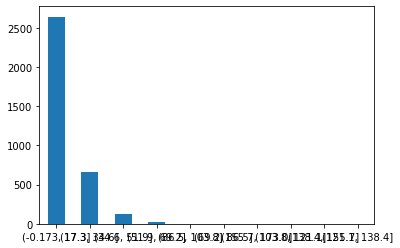

In [227]:
counts = vendas['tempo_entrega_dist'].value_counts()
counts.plot.bar(rot=0)

In [228]:
vendas['tempo_entrega'].describe()

count    3467.000000
mean       13.586386
std        11.187574
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max       173.000000
Name: tempo_entrega, dtype: float64

In [0]:
#Discretizando com números de elementos iguais
vendas['tempo_entrega_dist'] = pd.qcut(vendas['tempo_entrega'],4)

In [230]:
vendas['tempo_entrega_dist'].value_counts()

(-0.001, 7.0]    1045
(17.0, 173.0]     823
(11.0, 17.0]      800
(7.0, 11.0]       799
Name: tempo_entrega_dist, dtype: int64

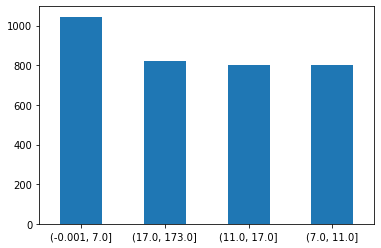

In [231]:
counts = vendas['tempo_entrega_dist'].value_counts()
counts.plot.bar(rot=0)

**Limpeza de dados - univariado e bivariado**

In [232]:
print(vendas.loc[(vendas['order_delivered_customer_date'] < vendas['order_aproved_at'])])

      order_status  order_products_value  ...  tempo_entrega  tempo_entrega_dist
360              1                799.99  ...            0.0       (-0.001, 7.0]
2351             1                129.00  ...            0.0       (-0.001, 7.0]
3429             1                449.50  ...            0.0       (-0.001, 7.0]

[3 rows x 27 columns]


In [0]:
vendas = vendas.drop([360,2351,3429])

In [234]:
# Verificando registros duplicados
vendas[vendas.duplicated()].sort_values("order_purchase_timestamp").head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,order_products_value_norm,tempo_entrega,tempo_entrega_dist
2160,1,22.9,15.10,1,2,2017-05-29 21:46:58,2017-05-29 21:55:18.706403,2017-06-21,2017-06-06 19:14:35.279012,665,17,53,5,0,0,0,0,0,0,0,0,3,8,2,-0.537103,7.0,"(-0.001, 7.0]"
3056,1,29.9,11.85,1,3,2017-06-09 22:48:56,2017-06-09 23:15:12.664594,2017-07-06,2017-06-23 11:15:01.405127,744,24,45,4,0,0,0,0,0,0,0,0,3,8,2,-0.502372,13.0,"(11.0, 17.0]"
2196,1,40.0,17.60,1,4,2017-06-12 13:50:44,2017-06-12 14:02:42.427523,2017-07-05,2017-06-26 13:32:38.972073,665,17,12,5,3,0,0,0,0,0,0,0,0,0,2,-0.452261,13.0,"(11.0, 17.0]"
2954,1,40.0,17.60,1,4,2017-06-12 13:50:44,2017-06-12 14:02:42.427523,2017-07-05,2017-06-26 13:32:38.972073,665,17,12,5,3,0,0,0,0,0,0,0,0,0,2,-0.452261,13.0,"(11.0, 17.0]"
2670,1,40.0,17.60,1,4,2017-06-12 13:50:44,2017-06-12 14:02:42.427523,2017-07-05,2017-06-26 13:32:38.972073,665,17,12,5,3,0,0,0,0,0,0,0,0,0,2,-0.452261,13.0,"(11.0, 17.0]"


In [235]:
len(vendas)

3464

In [236]:
vendas.drop_duplicates(keep = False, inplace = True)
print(len(vendas))

3292


Removendo outliers

In [237]:
vendas['tempo_entrega'].describe()

count    3292.000000
mean       13.674058
std        11.308648
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max       173.000000
Name: tempo_entrega, dtype: float64

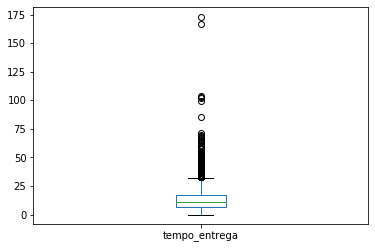

In [238]:
vendas['tempo_entrega'].plot.box()

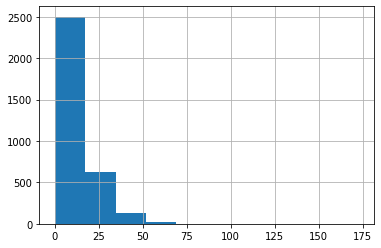

In [183]:
vendas['tempo_entrega'].hist()

Utilizando z-score robusto (univariado)

In [239]:
from numpy import abs
mad = abs(vendas['tempo_entrega'] - vendas['tempo_entrega'] .median()).median()*(1/0.6745)
print(mad)

7.412898443291327


In [240]:
vendas2 = vendas[abs(vendas['tempo_entrega']-vendas['tempo_entrega'].median())/mad < 3.5]
print(len(vendas2))

3158


In [0]:
#vendas = vendas2

Utilizando método de tukey (univariado)

In [243]:
q1 = vendas['tempo_entrega'].quantile(q=0.25)
q3 = vendas['tempo_entrega'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

10.0


In [244]:
vendas[vendas['tempo_entrega'] < (q1-1.5*iqr)]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,order_products_value_norm,tempo_entrega,tempo_entrega_dist,tempo_entrega_log


In [245]:
vendas[vendas['tempo_entrega'] > (q3+1.5*iqr)]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,order_products_value_norm,tempo_entrega,tempo_entrega_dist,tempo_entrega_log
40,1,199.90,18.65,1,1,2018-03-03 20:41:08,2018-03-06 03:50:29.062239,2018-03-28,2018-04-12 22:56:33.779756,575,16,12,1,0,3,0,0,0,0,0,0,0,1,0,0.341083,37.0,"(17.0, 173.0]",1.568202
42,1,53.99,17.66,1,1,2017-11-25 09:14:23,2017-11-25 09:33:12.183625,2017-12-21,2017-12-28 23:26:52.837191,274,4,52,1,0,3,0,0,0,0,0,0,0,1,0,-0.382850,33.0,"(17.0, 173.0]",1.518514
72,1,84.99,35.91,1,1,2017-11-27 19:28:04,2017-11-27 19:56:59.601857,2017-12-27,2018-01-12 22:58:47.806840,762,8,10,1,0,3,0,0,0,0,0,0,0,1,0,-0.229043,46.0,"(17.0, 173.0]",1.662758
73,1,89.90,17.88,1,1,2017-12-01 12:18:11,2017-12-02 02:38:25.527447,2018-01-04,2018-01-05 17:06:15.484568,27,17,12,1,0,0,0,0,0,2,1,0,0,5,0,-0.204682,34.0,"(17.0, 173.0]",1.531479
92,1,120.00,14.59,1,1,2018-01-13 23:59:06,2018-01-14 00:09:53.625582,2018-02-15,2018-04-28 18:51:38.072805,665,17,11,1,0,3,0,0,0,0,0,0,0,1,0,-0.055341,104.0,"(17.0, 173.0]",2.017033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,1,119.90,27.16,1,1,2018-02-12 20:13:27,2018-02-12 20:28:16.184463,2018-03-09,2018-03-26 15:11:33.754268,406,22,42,3,0,3,0,0,0,0,0,0,0,1,0,-0.055837,41.0,"(17.0, 173.0]",1.612784
3563,1,254.00,13.28,1,1,2017-09-20 18:34:24,2017-09-20 18:45:41.832459,2017-10-11,2017-11-03 12:32:33.662722,143,24,10,1,0,1,0,1,0,0,1,0,0,-1,-1,0.609501,43.0,"(17.0, 173.0]",1.633468
3565,1,159.00,15.86,1,1,2017-11-24 20:57:27,2017-11-25 00:31:33.910039,2017-12-19,2018-01-04 00:18:36.623085,229,16,12,2,0,0,0,2,0,0,0,1,0,3,1,0.138158,39.0,"(17.0, 173.0]",1.591065
3567,1,79.90,16.32,1,1,2017-12-01 12:18:05,2017-12-02 02:38:26.170619,2017-12-29,2018-01-29 19:56:55.630792,27,17,12,1,0,0,0,0,0,2,1,0,0,5,0,-0.254297,58.0,"(17.0, 173.0]",1.763428


In [246]:
vendas3 = vendas[(vendas['tempo_entrega'] > (q1-1.5*iqr)) & (vendas['tempo_entrega'] < (q3+1.5*iqr))]
len(vendas3)

3072

In [0]:
vendas = vendas3

In [0]:
Removendo outliers usando razão de duas variáveis (bivariado)

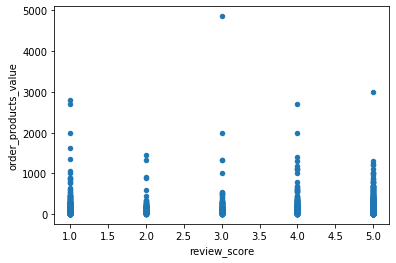

In [264]:
vendas.plot.scatter(x='review_score',y='order_products_value')

In [0]:
vendas['order_products_value_m2'] = vendas['order_products_value'] / vendas['review_score']

In [267]:
vendas['order_products_value_m2'].describe()

count    3072.000000
mean       52.149018
std       121.196995
min         0.904000
25%        11.980000
50%        23.325000
75%        49.800000
max      2799.000000
Name: order_products_value_m2, dtype: float64

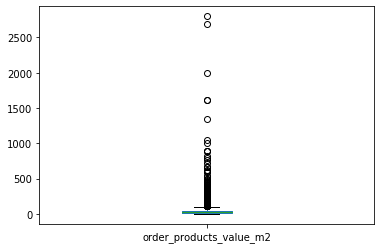

In [268]:
vendas['order_products_value_m2'].plot.box()

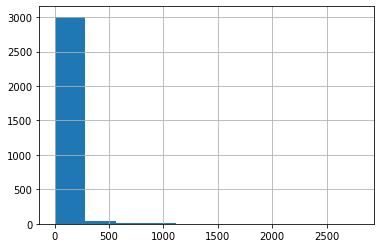

In [269]:
vendas['order_products_value_m2'].hist()

In [0]:
vendas['order_products_value_m2']= log10(vendas['order_products_value_m2'])

In [0]:
mad = abs(vendas['order_products_value_m2'] - vendas['order_products_value_m2'].median()).median()*(1/0.6745)

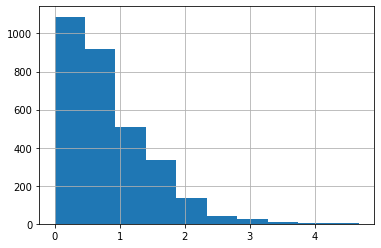

In [272]:
(abs(vendas['order_products_value_m2']-vendas['order_products_value_m2'].median())/mad).hist()

In [273]:
vendas[abs(vendas['order_products_value_m2']-vendas['order_products_value_m2'].median())/mad > 3.5]

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,order_products_value_norm,tempo_entrega,tempo_entrega_dist,tempo_entrega_log,order_sellers_qty_m2,tempo_entrega_m2,order_items_qty_m2,customer_state_m2,order_products_value_m2
160,1,1620.00,181.97,1,1,2017-08-01 12:54:43,2017-08-02 02:50:45.841900,2017-08-25,2017-08-15 17:52:09.681504,621,9,37,1,0,1,0,2,0,0,0,0,0,3,1,7.386913,13.0,"(11.0, 17.0]",1.113943,0.076923,13.0,0.076923,0.692308,3.209515
661,1,1352.00,236.64,8,1,2018-01-09 12:13:25,2018-01-09 12:29:18.670108,2018-02-07,2018-01-24 20:04:38.559044,563,4,59,1,0,0,0,0,0,3,0,0,0,5,0,6.057230,15.0,"(11.0, 17.0]",1.176091,0.066667,15.0,0.533333,0.266667,3.130977
1075,1,887.00,30.66,1,1,2018-02-13 21:37:33,2018-02-13 21:55:23.923193,2018-03-21,2018-03-03 00:23:24.533668,82,12,8,1,0,0,0,1,0,2,0,0,0,5,0,3.750131,17.0,"(11.0, 17.0]",1.230449,0.058824,17.0,0.058824,0.705882,2.947924
1658,1,897.00,71.88,3,1,2018-01-07 16:56:57,2018-01-07 17:09:24.155214,2018-02-07,2018-01-26 15:52:13.699509,665,17,45,1,0,3,0,0,0,0,0,0,0,1,0,3.799746,18.0,"(17.0, 173.0]",1.255273,0.055556,18.0,0.166667,0.944444,2.952792
1665,1,999.99,131.32,1,1,2017-05-30 09:27:11,2017-05-30 09:43:02.965092,2017-07-04,2017-06-19 16:11:47.254910,274,4,26,1,0,0,0,0,3,0,0,0,0,4,1,4.310732,20.0,"(17.0, 173.0]",1.301030,0.050000,20.0,0.050000,0.200000,2.999996
1686,1,1050.00,21.10,1,1,2017-11-23 11:47:25,2017-11-23 11:55:54.986930,2017-12-12,2017-12-18 19:58:00.921791,88,9,27,1,0,3,0,0,0,0,0,0,0,1,0,4.558856,25.0,"(17.0, 173.0]",1.397940,0.040000,25.0,0.040000,0.360000,3.021189
2157,1,1999.99,26.55,1,1,2017-06-17 21:58:41,2017-06-20 11:24:00.423770,2017-06-30,2017-07-08 11:12:11.381618,772,24,7,1,0,1,0,0,0,0,0,1,0,-1,-1,9.272234,17.0,"(11.0, 17.0]",1.230449,0.058824,17.0,0.058824,1.411765,3.301028
2163,1,2799.00,28.00,1,1,2017-05-16 17:42:20,2017-05-17 02:10:12.090943,2017-06-22,2017-05-29 09:47:51.344443,475,16,26,1,0,0,0,0,3,0,0,0,0,4,1,13.236524,12.0,"(11.0, 17.0]",1.079181,0.083333,12.0,0.083333,1.333333,3.447003
2753,1,4850.00,185.48,1,1,2017-07-13 08:13:52,2017-07-13 08:25:12.649323,2017-08-09,2017-07-20 21:07:46.938441,229,16,25,3,0,0,0,0,0,3,0,0,0,5,0,23.412565,7.0,"(-0.001, 7.0]",0.845098,0.142857,7.0,0.142857,2.285714,3.208620
3305,1,2690.00,61.24,1,1,2017-04-06 13:44:08,2017-04-06 13:55:17.137512,2017-05-04,2017-05-08 10:52:06.461797,752,17,33,1,0,2,0,0,0,0,1,0,0,1,0,12.695720,31.0,"(17.0, 173.0]",1.491362,0.032258,31.0,0.032258,0.548387,3.429752


In [275]:
vendas = vendas[abs(vendas['order_products_value_m2']-vendas['order_products_value_m2'].median())/mad < 3.5]
print(len(vendas))

3061


Estatística descritiva dos dados

In [276]:
import matplotlib.pyplot as plt
%matplotlib inline
#Usando a correlação de Spearman
vendas.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,order_products_value_norm,tempo_entrega,tempo_entrega_log,order_sellers_qty_m2,tempo_entrega_m2,order_items_qty_m2,customer_state_m2,order_products_value_m2
order_status,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
order_products_value,nan,1.0,0.43,0.14,-0.11,-0.015,-0.056,-0.033,0.025,0.048,-0.0095,-0.031,0.032,-0.0068,-0.033,0.013,0.0027,-0.017,-0.031,0.022,1.0,0.084,0.084,-0.11,0.11,-0.038,-0.089,0.81
order_freight_value,nan,0.43,1.0,0.34,-0.11,-0.13,-0.44,0.016,-0.019,-0.051,-0.015,-0.045,0.0018,-0.026,0.052,0.023,-0.0047,0.019,0.034,-0.028,0.43,0.39,0.39,-0.38,0.38,-0.28,-0.48,0.37
order_items_qty,nan,0.14,0.34,1.0,0.017,-0.024,-0.025,0.032,-0.15,-0.076,0.018,-0.039,0.018,-0.0035,0.29,0.012,0.0006,-0.13,-0.054,-0.2,0.14,0.0075,0.0074,0.0033,-0.0032,0.28,-0.0086,0.2
order_sellers_qty,nan,-0.11,-0.11,0.017,1.0,-0.023,0.029,-0.045,-0.27,-0.14,0.072,-0.046,-0.0053,-0.028,0.53,-0.038,-0.018,-0.2,-0.07,-0.31,-0.11,-0.14,-0.14,0.51,-0.51,0.14,0.11,0.076
customer_city,nan,-0.015,-0.13,-0.024,-0.023,1.0,0.27,0.039,0.022,-0.013,0.013,0.019,0.0034,0.031,-0.054,0.0011,-0.0034,0.023,0.013,0.016,-0.015,-0.088,-0.087,0.059,-0.059,0.077,0.2,-0.025
customer_state,nan,-0.056,-0.44,-0.025,0.029,0.27,1.0,-0.007,-0.0051,0.026,0.021,0.056,0.029,0.027,-0.032,-0.00077,-0.014,-0.041,-0.05,-0.013,-0.056,-0.36,-0.36,0.31,-0.31,0.33,0.77,-0.05
product_category_name,nan,-0.033,0.016,0.032,-0.045,0.039,-0.007,1.0,-0.022,-0.0097,0.012,0.026,0.074,-0.0074,-0.02,0.014,0.0068,-0.012,0.0079,-0.00026,-0.033,0.027,0.027,-0.04,0.039,-0.012,-0.02,-0.02
review_score,nan,0.025,-0.019,-0.15,-0.27,0.022,-0.0051,-0.022,1.0,0.33,-0.3,-0.28,-0.31,-0.27,-0.43,-0.19,-0.12,0.61,0.36,0.75,0.025,-0.11,-0.11,-0.019,0.018,0.059,0.065,-0.49
votes_antes_prazo,nan,0.048,-0.051,-0.076,-0.14,-0.013,0.026,-0.0097,0.33,1.0,-0.14,-0.13,-0.14,-0.13,-0.19,-0.1,-0.073,-0.24,-0.47,0.35,0.048,-0.17,-0.17,0.097,-0.097,0.14,0.12,-0.13


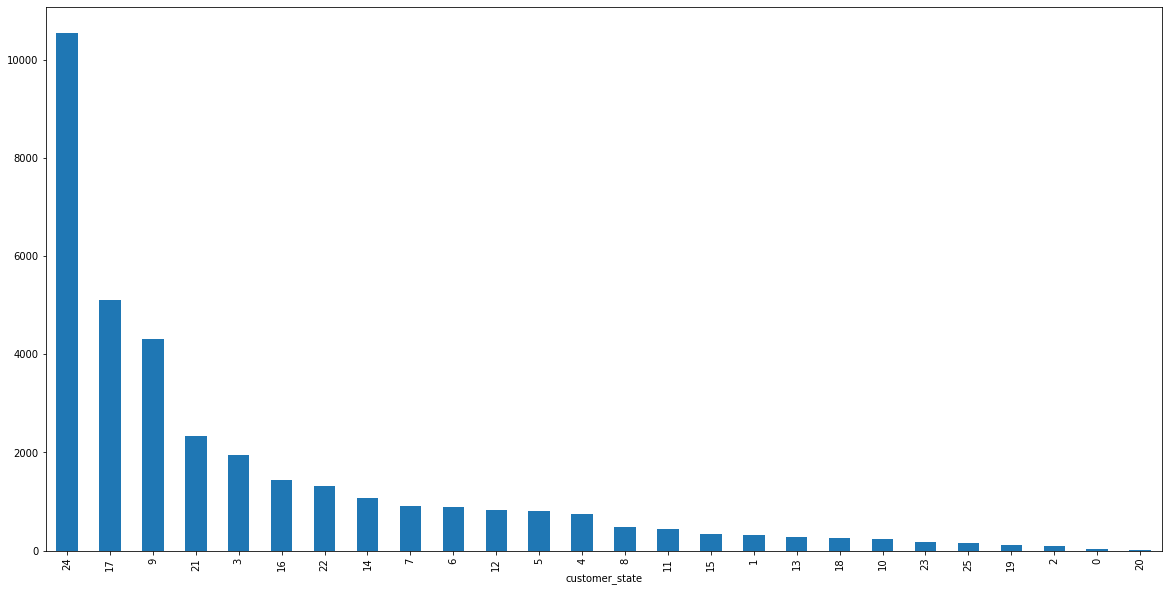

In [277]:
# Verificado o tempo de entrega por cada UF
vendas.groupby(['customer_state'])['tempo_entrega'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

Correlação

In [278]:
# Valor do frete  por estado
vendas.groupby(['customer_state']).agg(['mean','median'])['order_freight_value']

,mean,median
customer_state,,
0,40.773333,43.220
1,56.113750,38.755
2,31.220000,30.825
3,28.124918,20.730
4,34.895116,25.960
5,20.533433,17.610
6,23.354286,17.950
7,23.072286,17.670
8,40.017083,35.295


In [279]:
# Tempo de entrega  por estado
vendas.groupby(['customer_state']).agg(['mean','median'])['tempo_entrega']

,mean,median
customer_state,,
0,14.000000,12.0
1,19.750000,21.5
2,23.500000,25.0
3,15.885246,15.0
4,17.186047,17.0
5,12.029851,11.0
6,14.015873,13.0
7,13.057143,13.0
8,20.208333,20.0


In [110]:
vendas.corr(method='spearman')

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,tempo_entrega
order_status,1.000000,0.012846,0.010083,-0.028938,-0.029557,0.033208,-0.011210,-0.019262,-0.113540,-0.040729,0.152749,-0.011539,0.065732,-0.035197,-0.030997,0.033863,0.003644,-0.083392,-0.075658,-0.109199,-0.176415
order_products_value,0.012846,1.000000,0.446903,0.143451,-0.155999,-0.026400,-0.067314,-0.026350,-0.013694,0.026028,0.054851,-0.029744,0.042816,-0.001915,-0.048149,0.001856,0.006300,-0.044061,-0.052005,-0.014438,0.106758
order_freight_value,0.010083,0.446903,1.000000,0.333808,-0.113610,-0.131117,-0.438401,0.022055,-0.055474,-0.060185,0.074754,-0.048216,0.005364,-0.033074,0.036180,0.020322,0.001200,-0.024376,-0.006441,-0.072828,0.377008
order_items_qty,-0.028938,0.143451,0.333808,1.000000,-0.010332,-0.020388,-0.016601,0.035530,-0.115456,-0.063392,0.002805,-0.037437,0.020314,-0.006939,0.251425,-0.004285,0.015195,-0.112740,-0.034281,-0.159361,0.002674
order_sellers_qty,-0.029557,-0.155999,-0.113610,-0.010332,1.000000,-0.017052,0.033899,-0.046000,-0.195028,-0.113815,-0.001995,-0.051386,0.000706,-0.009862,0.475685,-0.035764,-0.016332,-0.145823,-0.021119,-0.227837,-0.111609
customer_city,0.033208,-0.026400,-0.131117,-0.020388,-0.017052,1.000000,0.262434,0.029949,0.012573,-0.019312,0.012928,0.020100,-0.003435,0.017857,-0.045347,0.002488,0.000912,0.019195,0.014208,0.009499,-0.086789
customer_state,-0.011210,-0.067314,-0.438401,-0.016601,0.033899,0.262434,1.000000,-0.014918,0.018849,0.033847,-0.037704,0.054267,0.023526,0.025912,-0.020534,-0.013558,0.011432,-0.013576,-0.020782,0.020865,-0.344947
product_category_name,-0.019262,-0.026350,0.022055,0.035530,-0.046000,0.029949,-0.014918,1.000000,-0.006631,-0.015169,-0.000264,0.018820,0.057090,-0.004186,-0.015094,-0.001314,0.025850,0.001155,0.024393,0.011357,0.006804
review_score,-0.113540,-0.013694,-0.055474,-0.115456,-0.195028,0.012573,0.018849,-0.006631,1.000000,0.350980,-0.425502,-0.218127,-0.289613,-0.217376,-0.374120,-0.185598,-0.130608,0.654662,0.380380,0.767398,-0.121420
votes_antes_prazo,-0.040729,0.026028,-0.060185,-0.063392,-0.113815,-0.019312,0.033847,-0.015169,0.350980,1.000000,-0.183187,-0.119255,-0.136368,-0.116360,-0.177733,-0.108132,-0.080125,-0.173837,-0.436159,0.367783,-0.162330


In [114]:
vendas.corr(method='pearson')

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_city,customer_state,product_category_name,review_score,votes_antes_prazo,votes_atrasado,votes_baixa_qualidade,votes_devolucao,votes_diferente_do_anunciado,votes_entrega_parcial,votes_outro_entrega,votes_outro_pedido,votes_satisfeito,most_voted_subclass,most_voted_class,tempo_entrega
order_status,1.000000,0.018295,-0.001886,-0.030910,-0.040479,0.040895,-0.013506,-0.010595,-0.151155,-0.046441,0.164255,-0.014438,0.055819,-0.034053,-0.040094,0.090231,0.016447,-0.096749,-0.085065,-0.124994,-0.152075
order_products_value,0.018295,1.000000,0.392256,0.109704,-0.078084,0.003265,-0.049314,0.021041,-0.036065,0.034688,0.046510,-0.028100,0.038124,0.020067,-0.021022,0.009463,0.028209,-0.068216,-0.062486,-0.030872,0.043941
order_freight_value,-0.001886,0.392256,1.000000,0.417525,-0.024646,-0.079082,-0.204000,0.040670,-0.073967,-0.053855,0.035828,-0.033461,0.043912,-0.020603,0.075731,0.003667,-0.006960,-0.042314,0.002846,-0.070169,0.184037
order_items_qty,-0.030910,0.109704,0.417525,1.000000,-0.026816,-0.007731,-0.002149,0.051160,-0.098912,-0.058724,-0.002273,-0.028266,0.011659,-0.023083,0.194071,-0.007325,0.003204,-0.083458,-0.010694,-0.133757,0.001154
order_sellers_qty,-0.040479,-0.078084,-0.024646,-0.026816,1.000000,-0.038986,0.040798,-0.032010,-0.186358,-0.090755,-0.019513,-0.062078,0.007274,-0.020383,0.492244,-0.047533,-0.021605,-0.143523,0.006827,-0.212037,-0.114029
customer_city,0.040895,0.003265,-0.079082,-0.007731,-0.038986,1.000000,0.234780,0.018913,0.005325,-0.015812,0.024076,0.020700,-0.000332,0.011766,-0.046169,0.002053,0.007138,0.020432,0.007885,0.011741,-0.033847
customer_state,-0.013506,-0.049314,-0.204000,-0.002149,0.040798,0.234780,1.000000,-0.018038,0.014125,0.020786,-0.025401,0.045824,0.030892,0.015030,-0.030397,-0.005825,0.018556,-0.019556,-0.020854,0.012536,-0.247088
product_category_name,-0.010595,0.021041,0.040670,0.051160,-0.032010,0.018913,-0.018038,1.000000,-0.005675,-0.015074,-0.008810,0.012948,0.058455,-0.010705,-0.018547,-0.011254,0.021867,0.004277,0.019365,0.017085,-0.026695
review_score,-0.151155,-0.036065,-0.073967,-0.098912,-0.186358,0.005325,0.014125,-0.005675,1.000000,0.328778,-0.435690,-0.188598,-0.266027,-0.202515,-0.368113,-0.140853,-0.110742,0.644301,0.370529,0.730429,-0.213874
votes_antes_prazo,-0.046441,0.034688,-0.053855,-0.058724,-0.090755,-0.015812,0.020786,-0.015074,0.328778,1.000000,-0.170610,-0.106399,-0.115401,-0.105490,-0.155841,-0.101620,-0.071900,-0.249259,-0.489419,0.340351,-0.152232
